## ÁLGEBRA LINEAR NUMÉRICA - Projeto 4

### ALUNOS: Alex Júnio Maia de Oliveira e João Pedro Jerônimo de Oliveira

### CURSO: Ciência de Dados e Inteligência Artificial

### ENTREGA: 21/06/2025

---

#### **Observação**: Caso não apareça o arquivo inteiro, apenas rode o Notebook novamente até aparecer o documento completo. Tal erro ocorreu com frequência no desenvolvimento do projeto.

In [2]:
# Bibliotecas usadas
import numpy as np
import seaborn as sns
import random
import time
from scipy.stats import gaussian_kde, gumbel_r, invweibull, weibull_max
import matplotlib.pyplot as plt
import multiprocessing as mp
import threading as mt

---

## Questão 1. **Matrizes Gaussianas** Uma matriz gaussiana tem todas as entradas $A_{ij}$ independentes e distribuídas segundo uma normal padrão, ou seja, $A_{ij} ∼ N(0,1)$.

#### a) **Distribuição das normas** Faça um histograma da norma-2 das colunas de uma matriz gaussiana $A$, $m × n$. Use vários valores de $m$, e comente o que você observa.

**Resposta:**

In [3]:
def norm2(x):
    return np.linalg.norm(x, ord=2)

def gaussian_matrix(m:int, n:int):
    return np.random.normal(0, 1, (m,n))

def plot_dist(datas:list, legends:list, xlabel, title="", bins=100, density=True, figsize=(6.4, 4.2)):
    n = len(datas)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.hist(datas[i], bins=bins, label=legends[i], density=density)
    if density:
        plt.ylabel("Densidade")
    else:
        plt.ylabel("Contagem")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()

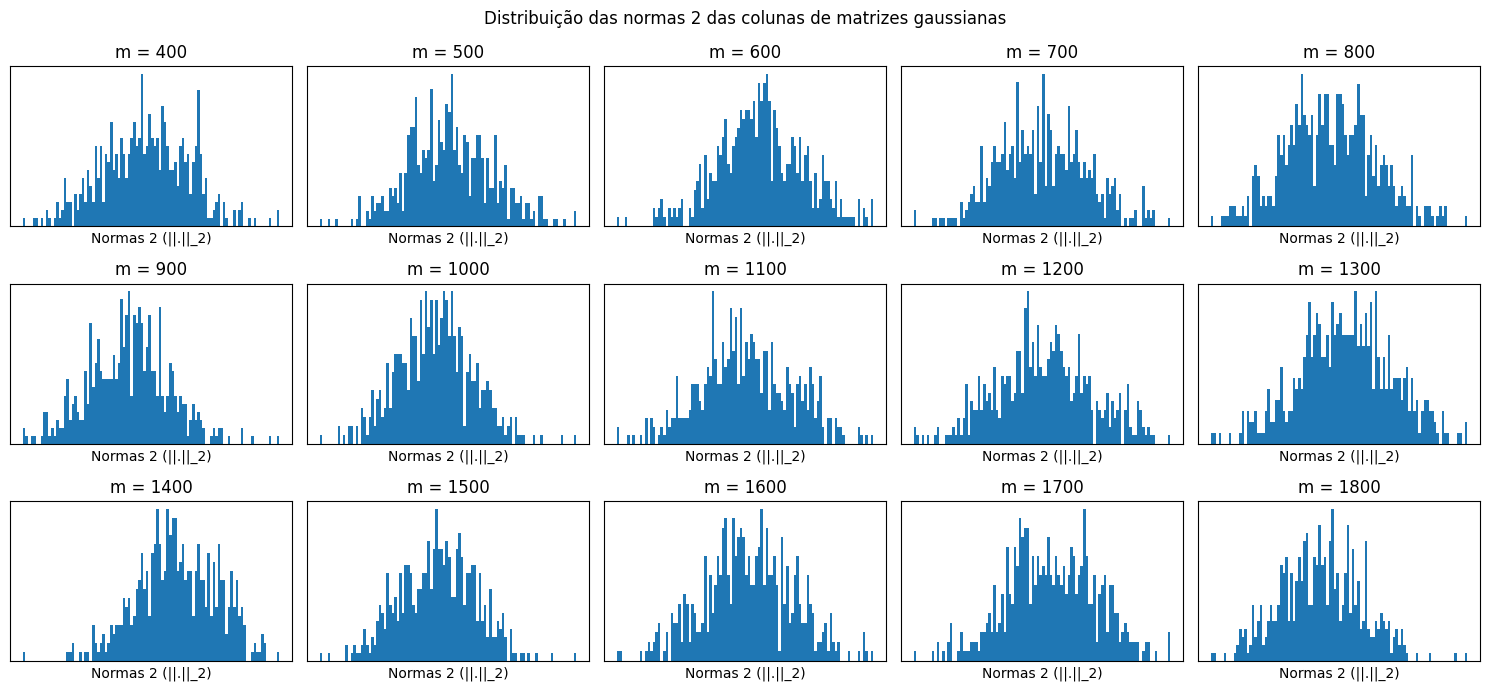

In [4]:
n = 500

grid = [
    [ 400, 500, 600, 700, 800 ],
    [ 900, 1000, 1100, 1200, 1300 ],
    [ 1400, 1500, 1600, 1700, 1800 ]
]

fig, axes = plt.subplots(3, 5, figsize=(15, 7))

fig.suptitle("Distribuição das normas 2 das colunas de matrizes gaussianas")

for i in range(len(grid)):
    for j, m in enumerate(grid[i]):
        A = gaussian_matrix(m,n)
        G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
        diag_val = np.diag(G)  # Os valores da diagonal é o quadrado da norma (G_ii = ⟨A_i, A_i⟩)
        norm = np.sqrt(diag_val)  # Calculando as normas (||A_i||_2 = √⟨A_i, A_i⟩)

        axes[i][j].set_title(f"m = {m}")

        axes[i][j].hist(
            norm,
            bins=100,
            label="Normas 2",
            density=True
        )

        axes[i][j].set_xlabel("Normas 2 (||.||_2)")
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])

plt.tight_layout()
plt.show()

Para ajudar na resolução da questão (e de exercícios posteriores), fizemos três funções: 
- `gaussian_matrix`: cria uma matriz $A$ com cada entrada $A_{ij} ∼ N(0, 1)$ e independentes
- `plot_dist`: faz um plot de várias distribuições

Fazendo testes com $m \in [2, 1000]$ e $n = 500$, criamos matrizes $A_{m×n}$ e calculamos as normas 2 de todas as suas colunas e plotamos a distribuição dos valores, relacionando a densidade de ocorrência de cada intervalo. Portanto, com base no gráfico **Distribuição das normas 2 das colunas de matrizes gaussianas**, concluímos que a distribuição dos valores se aproxima de uma distribuição triangular, a menos de um fator de "crecimento" do tamanho do triângulo.

A distribuição triangular tem *função de densidade de probabilidade (f.d.p):*
$$
f(x) = 
\begin{cases} 
0 & \text{para } x < a \\
\frac{2(x - a)}{(b - a)(c - a)} & \text{para } a \leq x \leq c \\
\frac{2(b - x)}{(b - a)(b - c)} & \text{para } c < x \leq b \\
0 & \text{para } x \geq b
\end{cases}
$$

no nosso caso: $a \approx 0 , b \approx 34 , c \approx 30$

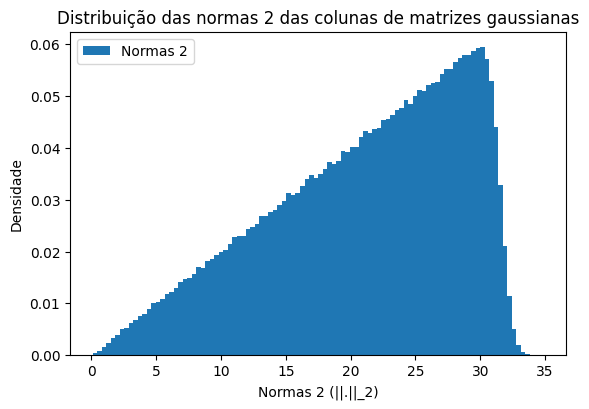

In [5]:
n = 500
norms = []
for m in range(2, 1001):
    A = gaussian_matrix(m,n)
    G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
    diag_val = np.diag(G)  # Os valores da diagonal é o quadrado da norma (G_ii = ⟨A_i, A_i⟩)
    norm = np.sqrt(diag_val)  # Calculando as normas (||A_i||_2 = √⟨A_i, A_i⟩)
    norms.extend(norm)

plot_dist([norms], density=True, xlabel="Normas 2 (||.||_2)", title="Distribuição das normas 2 das colunas de matrizes gaussianas", legends=["Normas 2"])

---

#### b) **Produtos internos** Agora, fixe $m = 100$ e faça o histograma do produto interno $⟨A_i, A_j⟩$ entre colunas de uma matriz gaussiana $A$. Exclua os casos $i = j$, e use $n = 100,200, 500$ e $1000$. O que acontece? Qual parece ser a distribuição para $n → ∞$?

**Resposta:**

Para ajudar na compreensão do exercício e numa inspiração para explicar o que ocorre quando $m → ∞$, fizemos o gráfico **Distribuição do produto interno das colunas de matrizes gaussianas**, em que mostramos a comparação da distribuição dos produtos internos entre as colunas de uma matriz gaussiana e a distribuição normal de média $0$ e variância $m$.

Pelo gráfico, percebemos que, quanto maior o valor de $m$, mais a distribuição dos produtos internos se aproxima da distribuição normal $N(0, m)$.

*Demonstração:*

- **Fato 1:** Sejam $X_1, X_2, X_3, X_4$ variáveis aleatórias independentes entre si e $Z_1 = X_1X_2, Z_2 = X_3X_4$. Portanto, temos que $Cov(Z_1, Z_2) = E(Z_1Z_2) - E(Z_1)E(Z_2) = E(X_1X_2X_3X_4) - E(X_1X_2)E(X_3X_4) = E(X_1)E(X_2)E(X_3)E(X_4) - E(X_1)E(X_2)E(X_3)E(X_4) = 0$ e, segue que, $Z_1, Z_2$ também são independente. Assim, podemos estender esse resultado para $Z_i = X_iY_i$ com $X_i, Y_i$ indenpendentes.
- **Fato2:** O *Teorema Central do Limite* nos diz que, dadas variáveis aleatórias $X_1, X_2, ..., X_n$ independentes, a soma $S_n = X_1 + X_2 + ... + X_n$ se aproxima da distribuição normal $N(0, n)$ (valor eperado $0$ e variância $n$). A demonstração do teorema está no link: https://www.youtube.com/watch?v=aJcyQjskvqo.

Sejam as colunas $A_i = \begin{bmatrix} x_1 & x_2 & x_3 & \dots & x_m \end{bmatrix}$ e $A_j = \begin{bmatrix} y_1 & y_2 & y_3 & \dots & y_m \end{bmatrix}$. Assim, temos  $⟨A_i, A_j⟩ = \sum_1^mx_iy_i$. Fazendo $z_i = x_iy_i$, temos que $⟨A_i, A_j⟩ = \sum_1^mz_i$. Como as entradas de ambas as colunas são variáveis aleatórias independentes entre si (se estende por toda a matriz), temos que, pelo fato 1, as variáveis $z_1, z_2, ..., z_m$ são independentes entre si e, pelo fato 2, $S_m = ⟨A_i, A_j⟩ = \sum_1^mz_i$ se aproxima da distribuição normal $N(0, m)$ (isso se estende por toda a matriz).


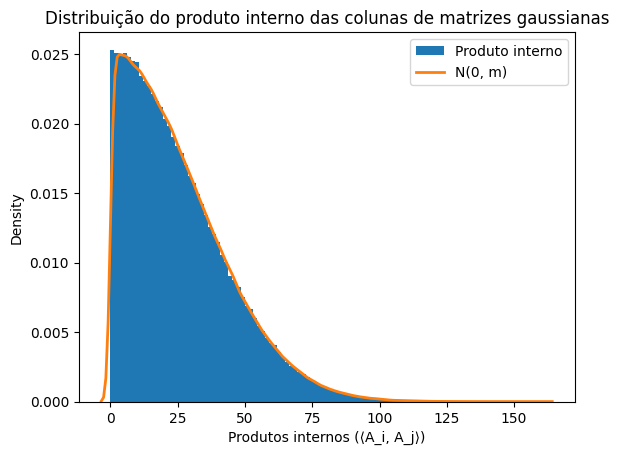

In [6]:
m = 1000
ns = [100, 200, 500, 1000]
prods = []
for n in ns:
    A = gaussian_matrix(m, n)
    G = np.dot(A.T, A)  # Calculando o produto interno (G_ij = ⟨A_i, A_j⟩)
    indices = np.triu_indices(n, k=1) # Valores de ⟨A_i, A_j⟩ para i != j      
    prod = np.abs(G[indices])  # Valor absoluto dos produtos internos                  
    prods.extend(prod)                            

# Plot específico para ver o comportamento da distribuição e compará-la
compare = np.abs(np.random.normal(loc=0, scale=np.sqrt(m), size=1400000))  # Criando uma amostra grande da normal para comparação
                                                                           # loc = esperança e scale = desvio padrão

plt.hist(prods, bins=100, label="Produto interno", density=True)
sns.kdeplot(compare, linewidth=2, label="N(0, m)")
plt.title("Distribuição do produto interno das colunas de matrizes gaussianas")
plt.xlabel("Produtos internos (⟨A_i, A_j⟩)")
plt.legend()
plt.show()

---

#### c) **A distribuição do máximo** Queremos ver quão “não ortogonal” é a matriz $A$. Para isto, vamos estudar o máximo de $\frac{⟨A_i, A_j⟩}{||A_i||||A_j||}$ entre colunas distintas de uma matriz gaussiana $A$. Para isto, gere $K = 1000$ matrizes gaussianas $A_k$ de ordem $100 × 300$, calcule o máximo indicado acima, e faça um histograma dos $K$ valores obtidos.

**Resposta:**

Vamos, primeiramente, fazer os cálculos pedidos na questão

In [11]:
def maxes(k=1000, m=100, n=300):
    max_similarities = []

    for _ in range(k):
        A = gaussian_matrix(m,n)
        A_normalized = A / np.linalg.norm(A, axis=0)
        G = np.dot(A_normalized.T, A_normalized) 
        np.fill_diagonal(G, 0)
        max_val = np.max(np.abs(G))
        max_similarities.append(max_val)

    return max_similarities

def maxes_for_multiprocessing(args):
    k, m, n = args
    max_similarities = []
    for _ in range(k):
        A = gaussian_matrix(m,n)
        A_normalized = A / np.linalg.norm(A, axis=0)
        G = np.dot(A_normalized.T, A_normalized) 
        np.fill_diagonal(G, 0)
        max_val = np.max(np.abs(G))
        max_similarities.append(max_val)
    
    return m, n, max_similarities

In [12]:
K = 1000
maxes_vals = maxes(k=K)

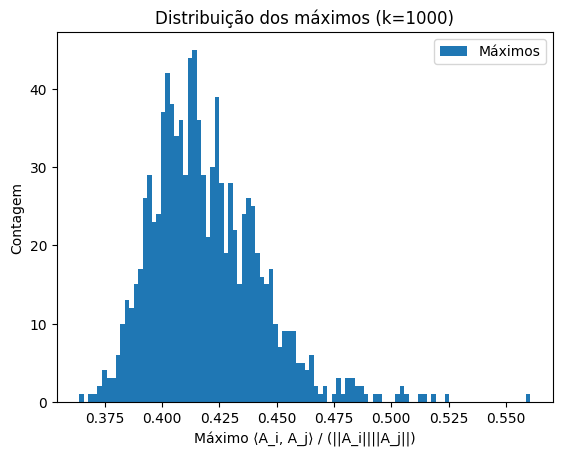

In [13]:
plot_dist([maxes_vals], ["Máximos"], xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)", title=f"Distribuição dos máximos (k={K})", density=False, figsize=(6.4, 4.8))

Algo notável de se observar é que, dependendo do $m$ e do $n$ que observarmos, o valor mais provável de se aparecer varia. Aqui, por exemplo, depois de rodar várias vezes, observamos que, com $m=100$ e $n=300$, os valores se concentram muito próximos a 0.4 e 0.42 (Como mostra o gráfico)

Durante as nossas pesquisas, também reparamos que esse gráfico se assemelha muito a o gráfico da função de densidade probabilística de uma distribuição chamada **Distribuição de Gumbel**. Veja:

![Exemplo de imagem](https://excelatfinance.com/xlf20/media/xlf-gumbel-density.png)

Curiosos, nós continuamos a pesquisar mais um pouco e descobrimos que essa função está associada a um problema muito interessante que vimos uma semelhança muito grande com o problema que estamos trabalhando:

**Teorema (Fisher-Tippett-Gnedenko):** Seja $X_1, X_2, ..., X_n$ uma sequência de variáveis aletórias i.i.d e seja $M_n = max(X_1, ..., X_n)$ o máximo das n variáveis.

Se existirem sequências de números reais $a_n \gt 0$ e $b_n$ tais que a distribuição $\frac{M_n - b_n}{a_n}$ converge para uma distribuição não-degenerada quando $n \rightarrow \infin$, então essa distribuição limite $G(x)$ pertence a uma dessas famílias:

1. Distribuição de Gumbel: $G(x) = e^{-e^{-x}} = exp(-exp(-x))$
2. Distribuição de Fréchet: $G(x) = e^{-x^{-\alpha}} = exp(-x^{-\alpha})$ para $x \gt 0$ e $\alpha \gt 0$
3. Distribuição de Weibull: $G(x) = e^{-(-x)^{\alpha}} = exp(-(-x)^{\alpha})$ para $x \lt 0$ e $\alpha \gt 0$

Repare como esse enunciado se assemelha com o nosso problema, onde eu posso definir $Y_{ij} = \frac{\langle A_i, A_j \rangle}{\|A_i\| \|A_j\|}$ e faz sentido $Y_{ij}$ seguirem uma distribuição aproximada e serem independentes. Claro, algumas variáveis vão sim ter certa dependência entre si mesmas, por exemplo, se compararmos $Y_{ij}$ com $Y_{ik}$. Por isso não afirmarmos que é exatamente o mesmo problema mas um problema bem parecido.

Porém, nós temos um palpite (Não conseguimos provar ou demonstrar, infelizmente) que a distribuição se aproxima de uma das citadas no teorema por conta que existem mais variáveis independentes do que dependentes e isso acaba que faz a distribuição ir se aproximando das citadas pelo teorema

---

#### d) **Complexidade computacional** Qual a complexidade de calcular o máximo acima? Qual valor de $K$ você acha que seria bom para ter uma boa estimativa do máximo esperado?

**Resposta:**

Anteriormente, tinhamos feito o seguinte código:
```py
for _ in range(k):
    A = gaussian_matrix(m, n)
    values = []
    for i in range(n):
        for j in range(n):
            if i != j:
                A_i = A[:, i]
                A_j = A[:, j]
                value = np.inner(A_i, A_j) / (norm2(A_i) * norm2(A_j))
                values.append(value)
    max = values[np.argmax(values)]
```

De antemão, podemos notar que nenhum dos `for` vão parar de executar antes que **todas** as iterações aconteçam. Ou seja, de antemão, vemos que os 3 `for` iniciais nos geram uma complexidade de:
$$
    O(k n^2)
$$
Entretando, dentro desses loops, ainda temos as operações de **produto interno** e **norma** que são $O(m)$, tendo em vista que as colunas tem $m$ elementos. Assim, temos que nosso resultado final de complexidade é:
$$
    O(k n^2 m)
$$

Agora nós temos o código atual vetorizado mais otimizado:

```py
for _ in range(k):
    A = gaussian_matrix(m,n)
    A_normalized = A / np.linalg.norm(A, axis=0)
    G = np.dot(A_normalized.T, A_normalized) 
    np.fill_diagonal(G, 0)
    max_val = np.max(np.abs(G))
    max_similarities.append(max_val)
```

Esse algoritmo é mais otimizado (não teoricamente, e sim computacionalmente) pois eu vou realizar as operações usando as funções do próprio numpy (Que são mais otimizadas). Se olharmos o custo computacional teórico, vamos percorrer $k$ iterações e dentro de cada iteração, a operação mais custosa é $np.dot(A_normalized.T, A_normalized)$ que é uma multiplicação de matrizes $n \times m$ e $m \times n$, o que nos dá um custo $O(mn^2)$, logo, nosso custo final fica
$$
    O(k n^2 m)
$$
O mesmo custo teórico de antes

Descobrimos também que, teoricamente, podemos diminuir a complexidade do algoritmo de $O(kn^2m)$ para $O(knm^2)$ $(m \le n)$. Primeiramente, fazemos a decomposição SVD reduzida da matriz $A = U\Sigma V^*$, pois pagamos na ordem de $nm^2$ iterações. Após isso, calculamos $A^*A = V\Sigma^* \Sigma V^* = V\Sigma^2V$. Como $\Sigma$ é uma matriz diagonal, pagamos na ordem de $m$ iterações para fazer $x = \Sigma^2V$ e mais $m$ para fazer $Vx$. Por fim, pagamos mais uma ordem $O(1)$ iterações para achar os valores máximos (precisamos percorrer apenas acima ou abaixo da diagonal principal). Repetindo tal processo $K$ vezes, obtemos uma complexidade $O(kn^2m)$.

---

#### e) **A distribuição do máximo, parte 2** Escolha valores de $K$ correspondentes e faça histogramas e comente os resultados para os seguintes pares de $(m, n): (100, 100), (100, 300), (200, 200), (200, 600), (500, 500), (500, 1500), (1000, 1000), (1000, 3000)$.

**Resposta:**

In [43]:
K = 30000

values = [
    (K, 100, 100),
    (K, 100, 300),
    (K, 200, 200),
    (K, 200, 600),
    (K, 500, 500),
    (K, 500, 1500),
    (K, 1000, 1000),
    (K, 1000, 3000)
]

with mp.Pool() as pool:
    results = pool.map(maxes_for_multiprocessing, values)

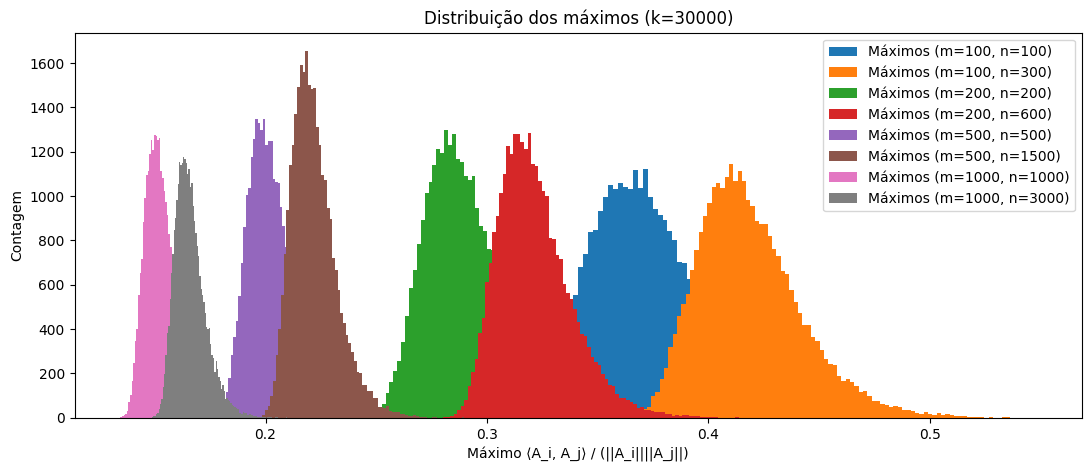

In [44]:
plot_dist(
    [result[2] for result in results],
    [f"Máximos (m={result[0]}, n={result[1]})" for result in results],
    xlabel="Máximo ⟨A_i, A_j⟩ / (||A_i||||A_j||)",
    title="Distribuição dos máximos (k=30000)", density=False,
    figsize=(13, 5)
)

A gente consegue perceber que, conforme aumentamos o valor de $m$, os máximos vão se concentrando cada vez mais próximos de $0$. Enquanto, se aumentamos o valor de $n$, os valores vão se afastando de $0$. De forma que, conforme aumentamos ambos juntos, as distribuições vão ficando cada vez mais coladinhas.

Muito provavelmente isso ocorre pois, conforme aumentamos a quantidade de valores na coluna, é o mesmo que aumentar a quantidade de repetições de um experimento de uma variável $N(0, 1)$. Como todos os elementos da matriz seguem $N(0,1)$, faz sentido interpretar a matriz $A$ de forma que cada coluna $A_k$ é uma variável aleatória e os elementos do vetor da coluna representam as observações de $A_k$. E como todos os eventos são independentes entre si, faz sentido que $A_i$ e $A_j$ sejam variáveis independentes, ou seja, conforme eu aumentar a quantidade de elementos (amostras), mais eu vou perceber o quão não semelhantes essas variáveis são, e acaba que o máximo dessa semelhança vai convergindo pra $0$ conforme "realizamos mais experimentos"

E seguindo a mesma lógica, quanto mais variáveis eu adiciono sem aumentar a quantidade de amostras, maiores são as chances de encontrar valores de semelhança altos, ou seja, variáveis que, para mostrar que são independentes, eu precisaria de mais amostras

E se aumentarmos as duas quantidades juntos, por conta de eu ter MUITAS amostras, eu preciso adicionar MUITAS variáveis para ter uma diferença significativa no aumento da similaridade, por isso que conforme eu aumento ambos os parâmetros, menor é a distância entre cada curva

Segue aqui o gŕafico obtido rodando $K=30000$ por questões de eu não querer perder o meu precioso gráfico :) (Demorou 210 minutos)

![Output letra E](../images/output-e.png)

---